## Future Sales Prediction With Machine Learning

In [48]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [49]:
data = pd.read_csv("advertising.csv")
df = pd.DataFrame(data)
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [51]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

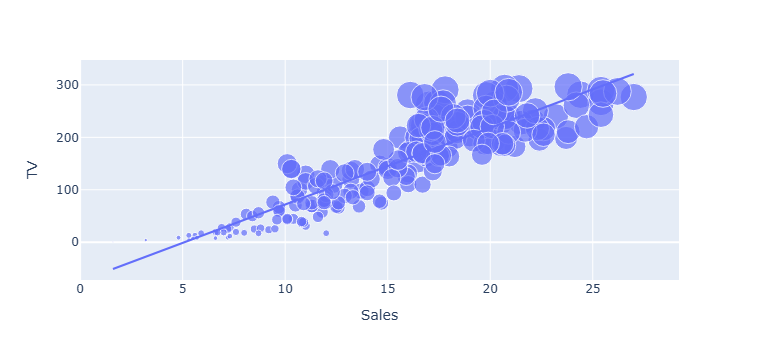

In [52]:
figure = px.scatter(data_frame = data, x = "Sales",
                    y = "TV", size = "TV", trendline = "ols")
figure.show()

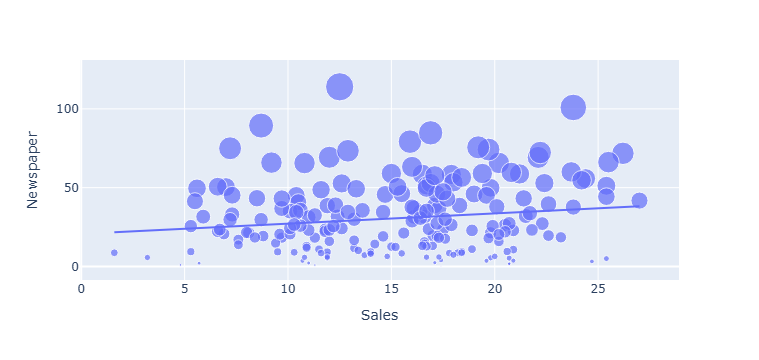

In [53]:
figure = px.scatter(data_frame = data, x = "Sales",
                    y = "Newspaper", size = "Newspaper", trendline = "ols")
figure.show()

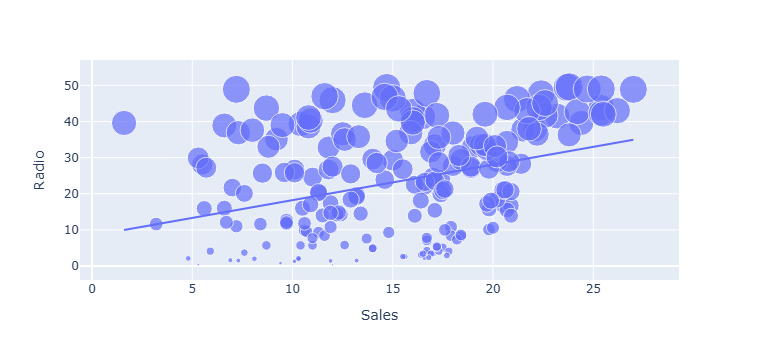

In [54]:
figure = px.scatter(data_frame = data, x = "Sales",
                    y = "Radio", size = "Radio", trendline = "ols")
figure.show()

In [55]:
correlation = data.corr()
correlation["Sales"].sort_values(ascending=False)

Sales        1.000000
TV           0.901208
Radio        0.349631
Newspaper    0.157960
Name: Sales, dtype: float64

### Future Sales Prediction Model

In [56]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9059011844150826

In [59]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [60]:
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

Mean Squared Error: 2.91
R-squared Score: 0.91


## Predict Future Sales

In [61]:
new_data = pd.DataFrame({'TV': [200], 'Radio': [40], 'Newspaper': [20]})
future_sales = model.predict(new_data)
print(f"Predicted Sales for new budget: {future_sales[0]:.2f}")

Predicted Sales for new budget: 19.74
